## Dataset 1

In [2]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pycountry
import kagglehub
import zipfile
import os

C:\Users\Samuele\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds1 = load_dataset("marcelomoreno26/geoguessr")

Generating test split: 100%|██████████| 5445/5445 [01:04<00:00, 83.81 examples/s] 


In [6]:
ds1

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 25160
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 5372
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 5445
    })
})

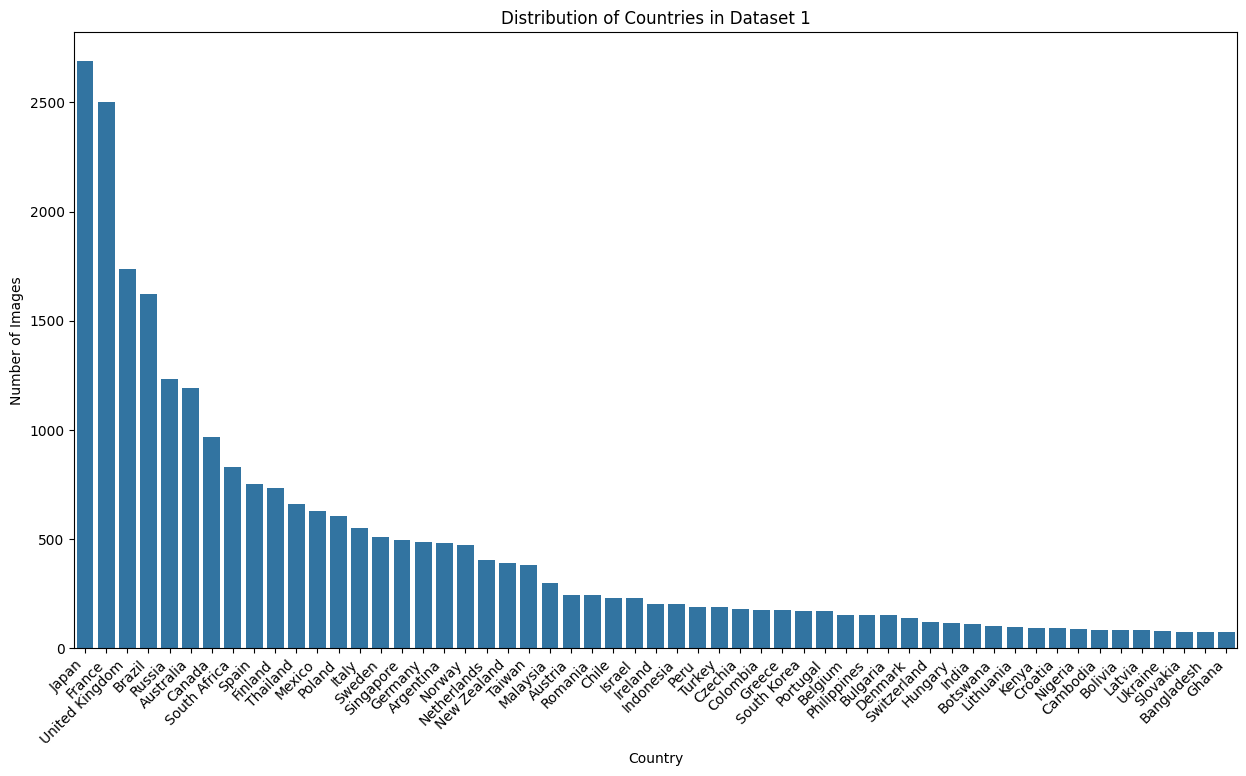

In [5]:
country_counts1 = Counter(ds1['train']['label'])
country_counts1

# Create a bar plot in descending order
plt.figure(figsize=(15, 8))
sns.barplot(x=list(country_counts1.keys()), y=list(country_counts1.values()), order=sorted(country_counts1, key=lambda x: country_counts1[x], reverse=True))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Countries in Dataset 1')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.show()


## Dataset 2

In [7]:
ds2 = load_dataset("stochastic/random_streetview_images_pano_v0.0.2")

Generating train split: 100%|██████████| 11054/11054 [04:42<00:00, 39.12 examples/s]


In [8]:
ds2

DatasetDict({
    train: Dataset({
        features: ['image', 'country_iso_alpha2', 'latitude', 'longitude', 'address'],
        num_rows: 11054
    })
})

In [9]:
def iso2_to_name(code):
    try:
        return pycountry.countries.get(alpha_2=code).name
    except:
        return code

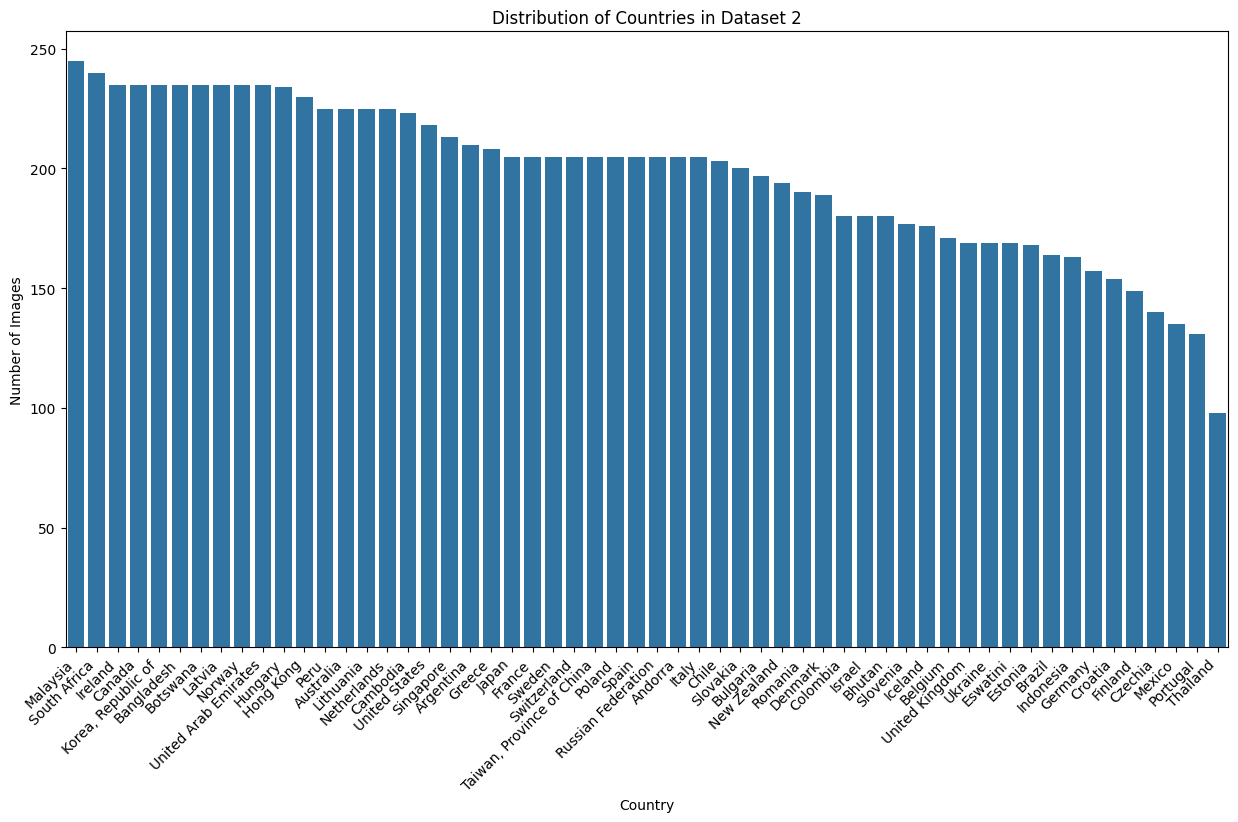

In [10]:
country_counts2 = Counter([iso2_to_name(code) for code in ds2['train']['country_iso_alpha2']])
country_counts2

# Create a bar plot in descending order
plt.figure(figsize=(15, 8))
sns.barplot(x=list((country_counts2.keys())), y=list(country_counts2.values()), order=sorted(country_counts2, key=lambda x: country_counts2[x], reverse=True))
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Countries in Dataset 2')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.show()


## Merged

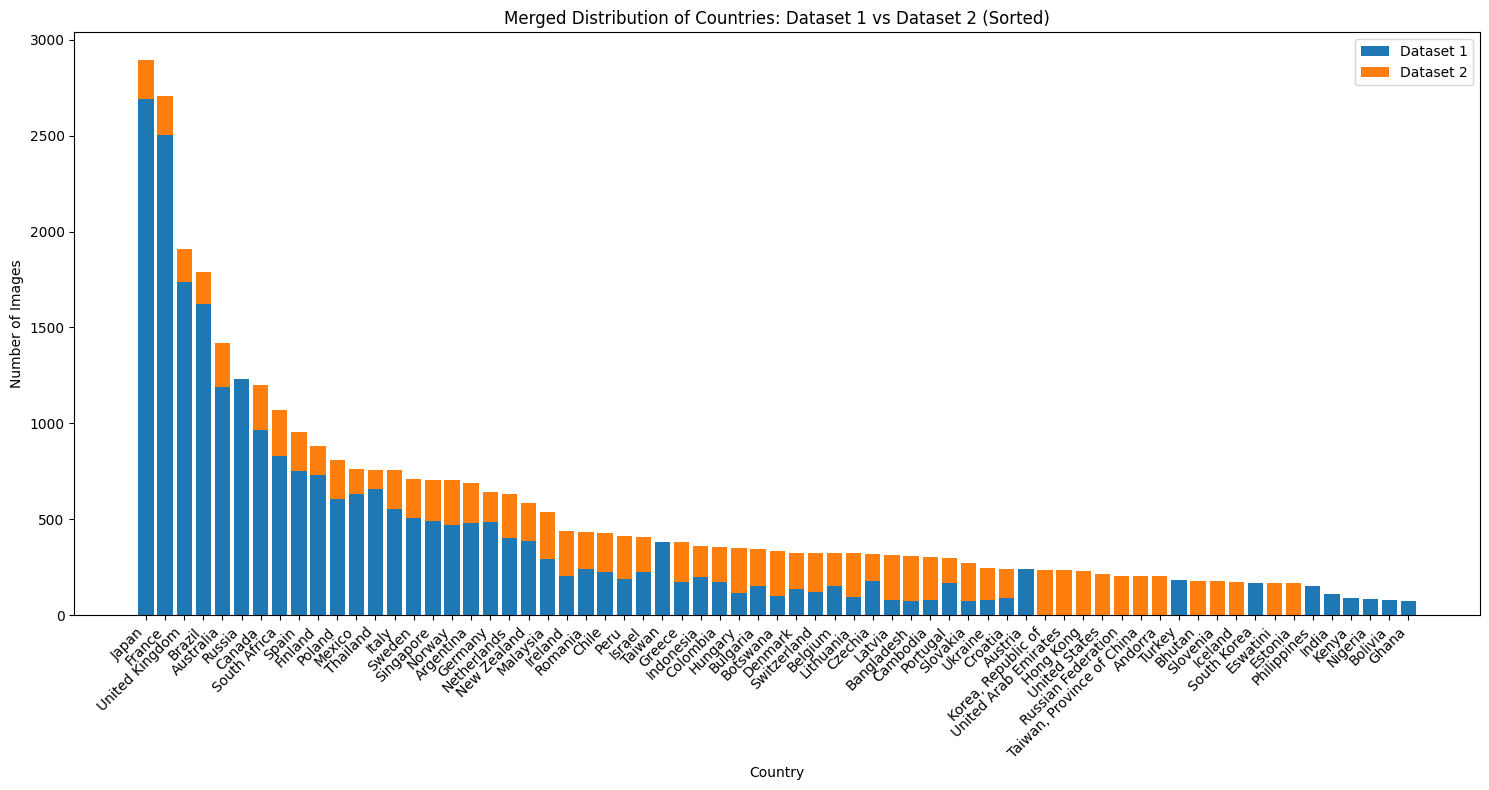

In [11]:
# Build a combined DataFrame
all_countries = sorted(set(country_counts1.keys()) | set(country_counts2.keys()))
data = {
    'Dataset 1': [country_counts1.get(c, 0) for c in all_countries],
    'Dataset 2': [country_counts2.get(c, 0) for c in all_countries]
}
df = pd.DataFrame(data, index=all_countries)
df['Total'] = df['Dataset 1'] + df['Dataset 2']

# Sort by total descending
df_sorted = df.sort_values(by='Total', ascending=False)

# Plot stacked bar chart
labels = df_sorted.index.tolist()
x = np.arange(len(labels))
ds1_vals = df_sorted['Dataset 1'].values
ds2_vals = df_sorted['Dataset 2'].values

plt.figure(figsize=(15, 8))
plt.bar(x, ds1_vals, label='Dataset 1', color='#1f77b4')
plt.bar(x, ds2_vals, bottom=ds1_vals, label='Dataset 2', color='#ff7f0e')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.title('Merged Distribution of Countries: Dataset 1 vs Dataset 2 (Sorted)')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

In [17]:
print(all_countries)

['Andorra', 'Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belgium', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Czechia', 'Denmark', 'Estonia', 'Eswatini', 'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Korea, Republic of', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Russian Federation', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Taiwan, Province of China', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States']


## Dataset 3

In [16]:
path = kagglehub.dataset_download("ubitquitin/geolocation-geoguessr-images-50k")

print("Path to dataset files:", path)

100%|██████████| 6.66G/6.66G [15:20<00:00, 7.76MB/s]  

Extracting files...


OSError: [Errno 28] No space left on device

In [83]:
dataset_path = '/Users/michelangelonardi/.cache/kagglehub/datasets/ubitquitin/geolocation-geoguessr-images-50k/versions/1/compressed_dataset'

# ─── STEP 1: Count image files per country ─────────────────────────────────────
country_counts3 = {}
for country in os.listdir(dataset_path):
    country_dir = os.path.join(dataset_path, country)
    if os.path.isdir(country_dir):
        # count only image extensions
        imgs = [f for f in os.listdir(country_dir)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        country_counts3[country] = len(imgs)

In [79]:
# ─── STEP 2: Build a DataFrame (keep only countries with more than 100 counts) and display ─────────────────────────────────────
df_counts3 = (
    pd.DataFrame.from_dict(country_counts3, orient='index', columns=['count'])
      .reset_index().rename(columns={'index':'country'})
      .sort_values('count', ascending=False)
      .query('count > 100')
)

,country,count
63,United States,12014
72,Japan,3840
21,France,3573
51,United Kingdom,2484
13,Brazil,2320
8,Russia,1761
46,Australia,1704
121,Canada,1382
90,South Africa,1183
39,Spain,1075


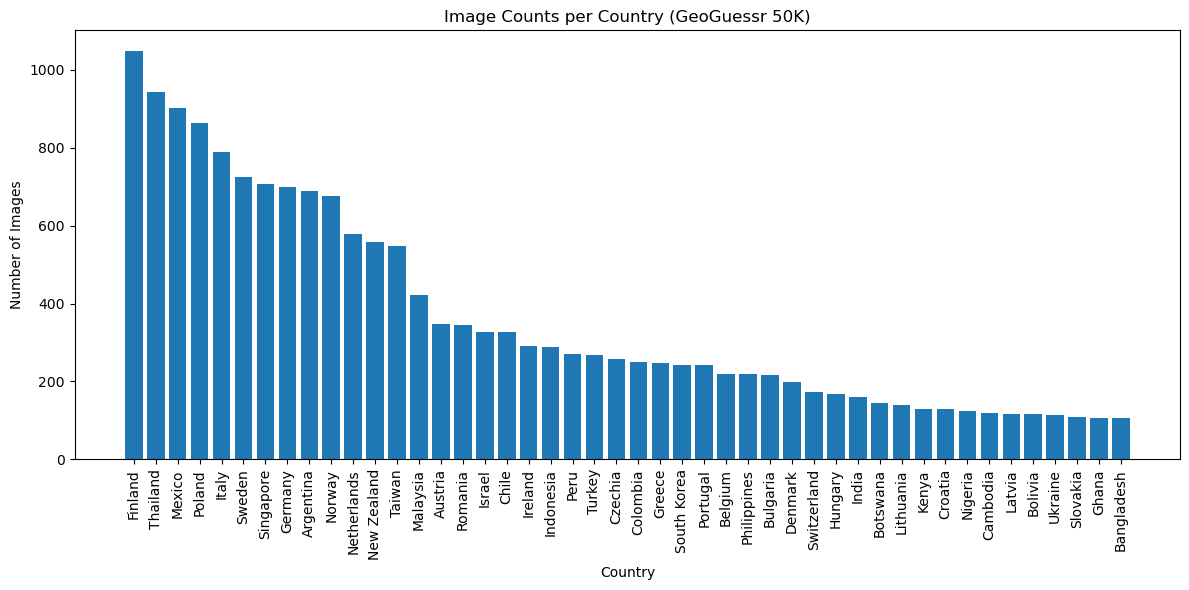

In [ ]:
# ─── STEP 3: Plot a bar chart with Matplotlib ──────────────────────────────────
plt.figure(figsize=(12, 6))
plt.bar(df_counts3['country'][10:], df_counts3['count'][10:])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.title('Image Counts per Country (GeoGuessr 50K)')
plt.tight_layout()
plt.show()

## Merged

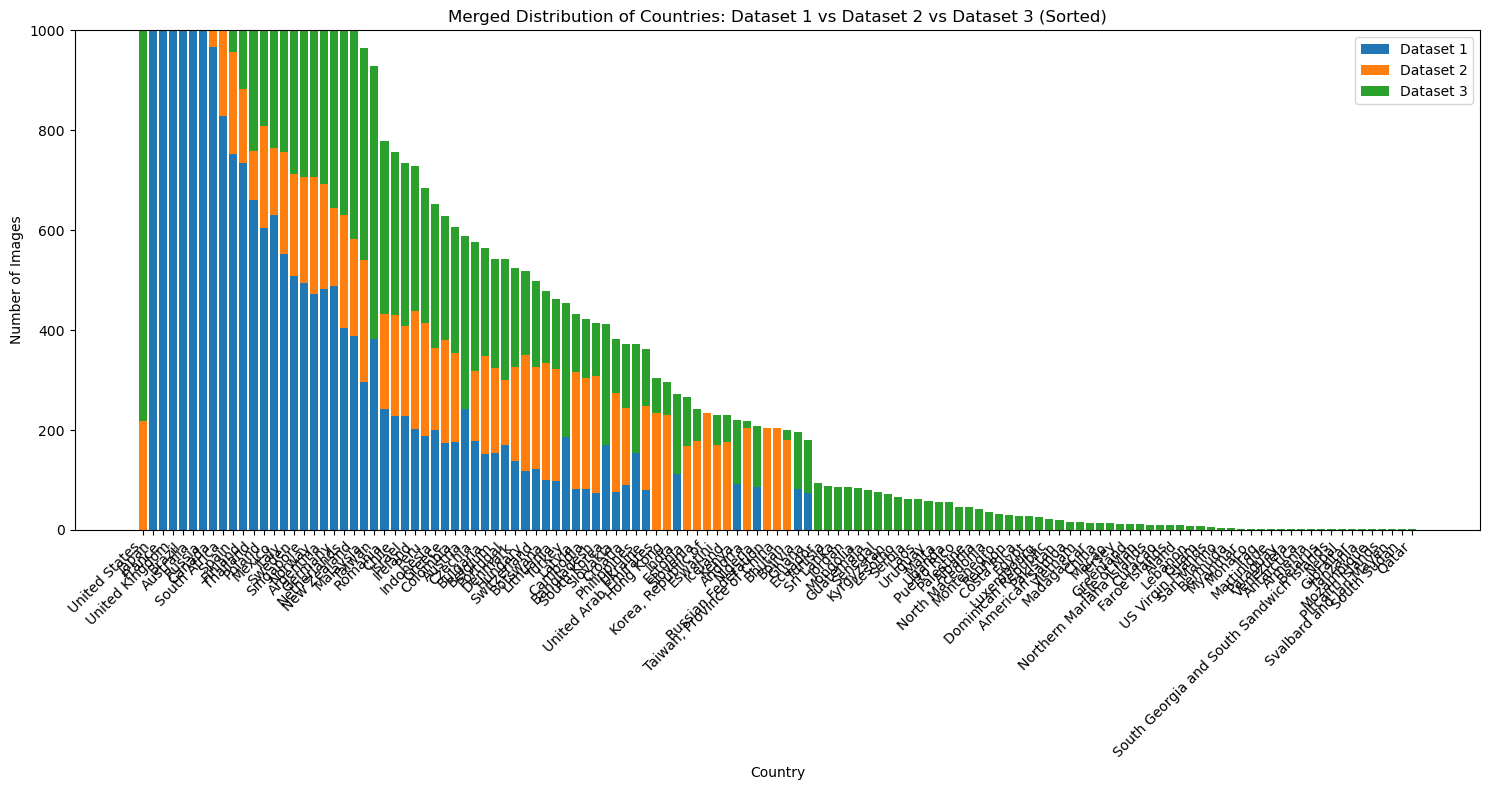

In [85]:
# Merge all country keys
all_countries = sorted(set(country_counts1.keys()) | set(country_counts2.keys()) | set(country_counts3.keys()))

# Build DataFrame
data = {
    'Dataset 1': [country_counts1.get(c, 0) for c in all_countries],
    'Dataset 2': [country_counts2.get(c, 0) for c in all_countries],
    'Dataset 3': [country_counts3.get(c, 0) for c in all_countries],
}
df = pd.DataFrame(data, index=all_countries)
df['Total'] = df.sum(axis=1)

# Sort by total descending
df_sorted = df.sort_values(by='Total', ascending=False)

# Prepare values
labels = df_sorted.index.tolist()
x = np.arange(len(labels))
ds1_vals = df_sorted['Dataset 1'].values
ds2_vals = df_sorted['Dataset 2'].values
ds3_vals = df_sorted['Dataset 3'].values

# Plot stacked bar chart with three colors
plt.figure(figsize=(15, 8))
plt.bar(x, ds1_vals, label='Dataset 1', color='#1f77b4')
plt.bar(x, ds2_vals, bottom=ds1_vals, label='Dataset 2', color='#ff7f0e')
plt.bar(x, ds3_vals, bottom=ds1_vals+ds2_vals, label='Dataset 3', color='#2ca02c')
plt.xticks(x, labels, rotation=45, ha='right')
plt.legend()
plt.title('Merged Distribution of Countries: Dataset 1 vs Dataset 2 vs Dataset 3 (Sorted)')
plt.xlabel('Country')
plt.ylabel('Number of Images')
plt.ylim(0, 1000)

plt.tight_layout()
plt.show()